# Tarea 01 **Pandas y gráficas**

#### Informe Estadístico: Análisis de Servicios de Taxi en Enero

A continuación, se presentan los principales hallazgos y visualizaciones del análisis realizado:

 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

 2. Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

 3. Qué tipo de taxi recibe más propinas en promedio

 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

 5. Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

 6. Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [7]:
yellow = pd.read_parquet('yellow_tripdata_2025-01.parquet')
green = pd.read_parquet('green_tripdata_2025-01.parquet')

yellowTotal = yellow['total_amount'].mean()
greenTotal = green['total_amount'].mean()
totalTaxis = (yellowTotal + greenTotal)/2

print("Yellow taxi average total amount: ", yellowTotal)
print("Green taxi average total amount: ", greenTotal)
print("Average total amount for all taxis: ", totalTaxis)

Yellow taxi average total amount:  25.61129169728817
Green taxi average total amount:  22.63424160907172
Average total amount for all taxis:  24.122766653179944


### Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [9]:
yellowDistance = yellow['trip_distance'].mean()
greenDistance = green['trip_distance'].mean()

print("Yellow taxi average trip distance: ", yellowDistance)
print("Green taxi average trip distance: ", greenDistance)

Yellow taxi average trip distance:  5.855126178844196
Green taxi average trip distance:  21.532410089806728


### Qué tipo de taxi recibe más propinas en promedio

In [10]:
yellowTip = yellow['tip_amount'].mean()
greenTip = green['tip_amount'].mean()
print("Yellow taxi average tip amount: ", yellowTip)
print("Green taxi average tip amount: ", greenTip)

Yellow taxi average tip amount:  2.9598127862763435
Green taxi average tip amount:  2.4818590406820342


### Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

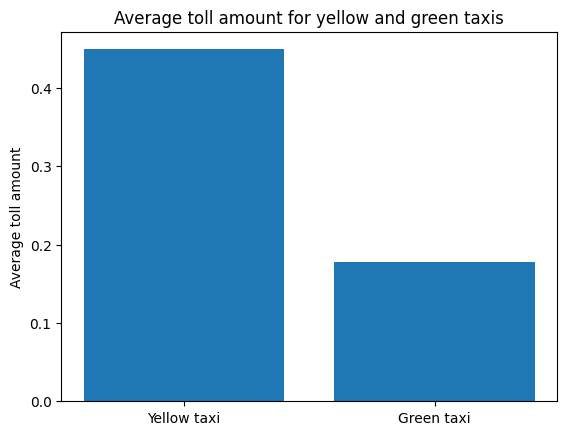

In [12]:
yellowToll = yellow['tolls_amount'].mean()
greenToll = green['tolls_amount'].mean()

plt.bar(['Yellow taxi', 'Green taxi'], [yellowToll, greenToll])
plt.ylabel('Average toll amount')
plt.title('Average toll amount for yellow and green taxis')
plt.show()

### Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

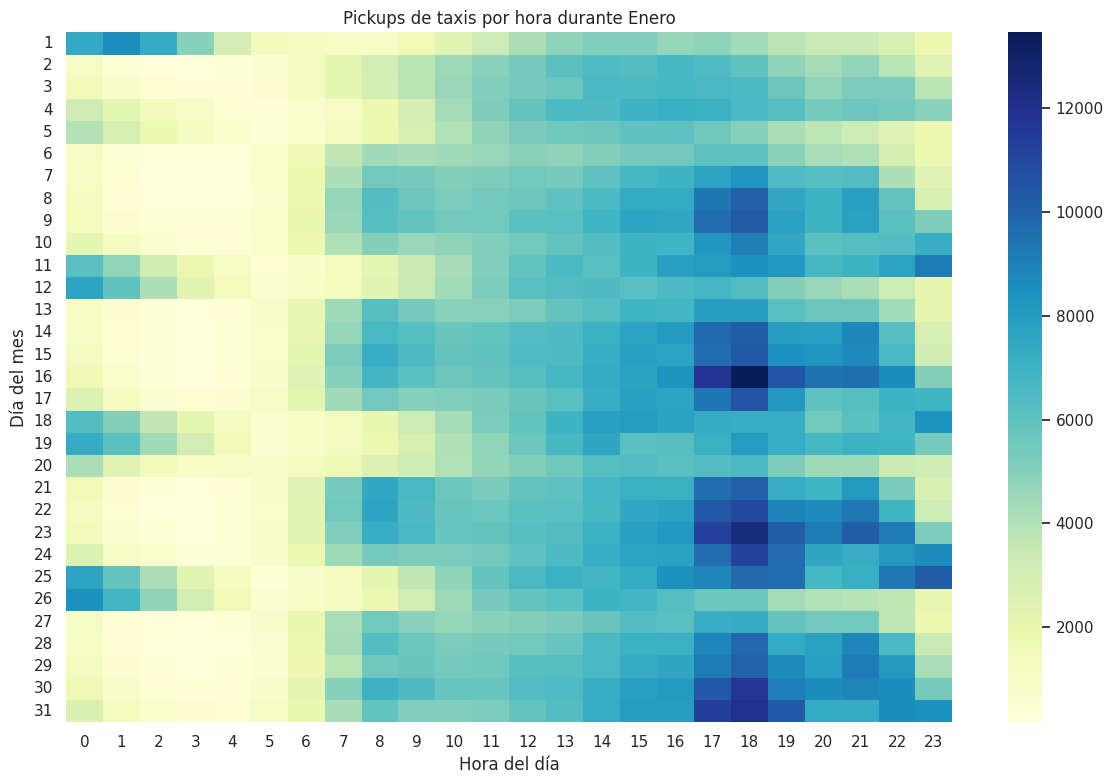

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes cargados los DataFrames 'yellow' y 'green'

# 1. Procesar datos de taxis amarillos (yellow)
yellow['day'] = yellow['tpep_pickup_datetime'].dt.day
yellow['hour'] = yellow['tpep_pickup_datetime'].dt.hour
yellow_counts = yellow.groupby(['day', 'hour']).size().unstack()

# 2. Procesar datos de taxis verdes (green)
green['day'] = green['lpep_pickup_datetime'].dt.day
green['hour'] = green['lpep_pickup_datetime'].dt.hour
green_counts = green.groupby(['day', 'hour']).size().unstack()

# 3. Combinar ambos conjuntos de datos (opcional)
total_counts = yellow_counts.add(green_counts, fill_value=0)

# 4. Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(total_counts, cmap='YlGnBu', annot=False, fmt='.0f')

# Personalizar el gráfico
plt.title('Pickups de taxis por hora durante Enero')
plt.xlabel('Hora del día')
plt.ylabel('Día del mes')
plt.yticks(rotation=0)  # Para que los días se vean horizontales

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

/tmp/ipykernel_11192/2749074456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_jan['day'] = yellow_jan['tpep_pickup_datetime'].dt.day
/tmp/ipykernel_11192/2749074456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_jan['hour'] = yellow_jan['tpep_pickup_datetime'].dt.hour
/tmp/ipykernel_11192/2749074456.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

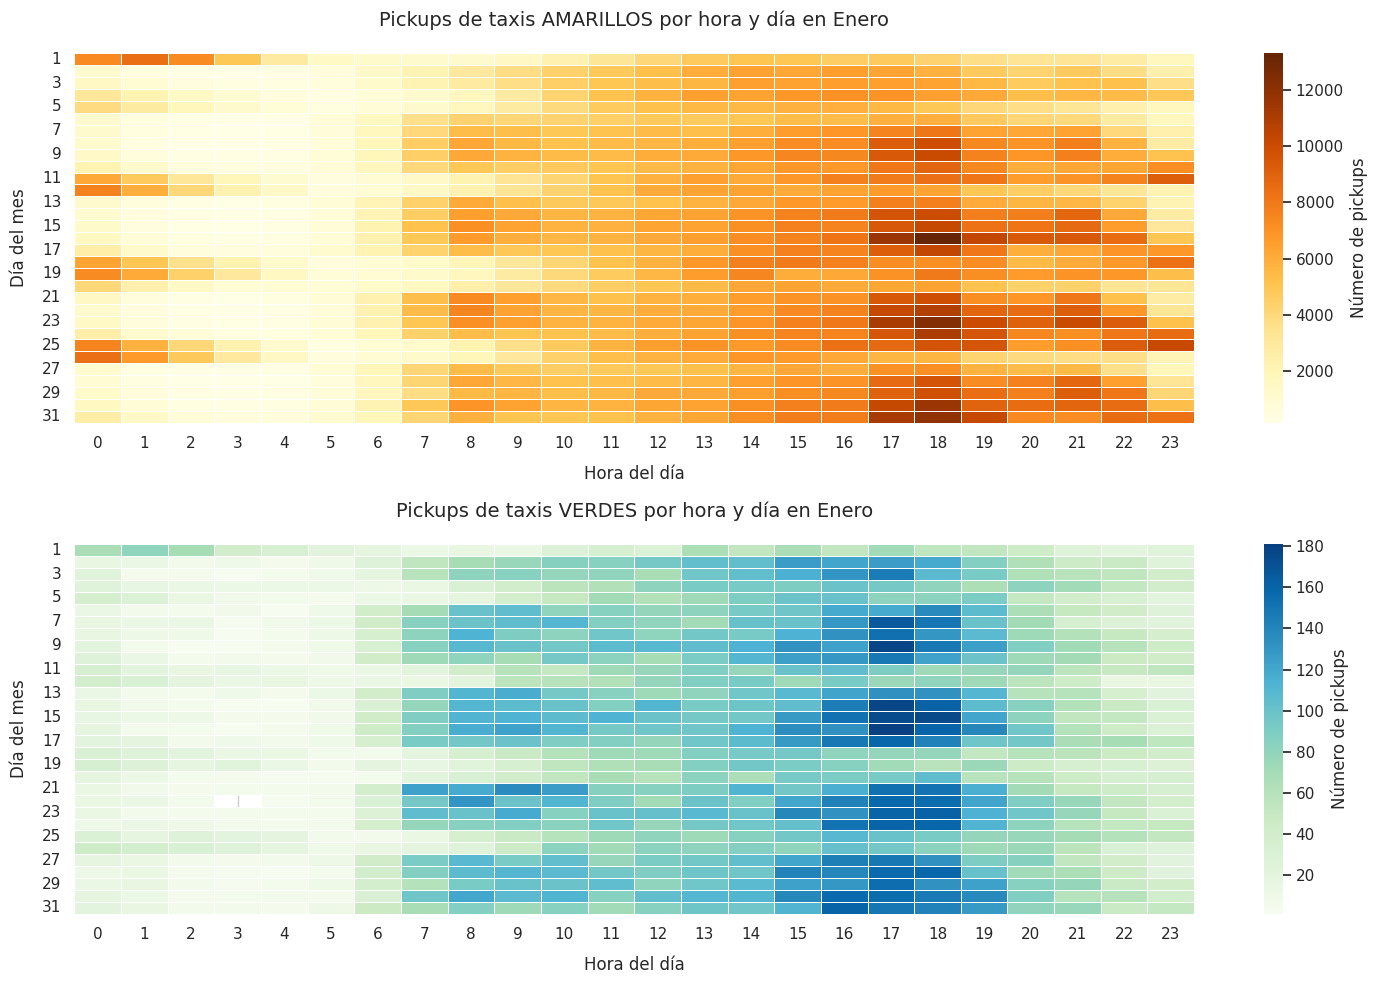

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer día y hora para taxis amarillos
yellow_jan['day'] = yellow_jan['tpep_pickup_datetime'].dt.day
yellow_jan['hour'] = yellow_jan['tpep_pickup_datetime'].dt.hour

# Extraer día y hora para taxis verdes
green_jan['day'] = green_jan['lpep_pickup_datetime'].dt.day
green_jan['hour'] = green_jan['lpep_pickup_datetime'].dt.hour

# Agrupar por día y hora (formato matriz para heatmap)
yellow_counts = yellow_jan.groupby(['day', 'hour']).size().unstack()
green_counts = green_jan.groupby(['day', 'hour']).size().unstack()

# Configurar estilo y tamaño de los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- Heatmap para taxis AMARILLOS ---
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, posición 1
sns.heatmap(
    yellow_counts,
    cmap="YlOrBr",  # Amarillo-Naranja (como los taxis)
    annot=False,     # Desactivar anotaciones para mejor legibilidad
    fmt=".0f",      # Formato numérico (0 decimales)
    linewidths=0.5,  # Líneas divisorias delgadas
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis AMARILLOS por hora y día en Enero", pad=20, fontsize=14)
plt.xlabel("Hora del día", labelpad=10)
plt.ylabel("Día del mes", labelpad=10)
plt.yticks(rotation=0)  # Días en horizontal

# --- Heatmap para taxis VERDES ---
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, posición 2
sns.heatmap(
    green_counts,
    cmap="GnBu",      # Verde-Azul (como los taxis verdes)
    annot=False,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis VERDES por hora y día en Enero", pad=20, fontsize=14)
plt.xlabel("Hora del día", labelpad=10)
plt.ylabel("Día del mes", labelpad=10)
plt.yticks(rotation=0)

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()